<a href="https://colab.research.google.com/github/LolaSM/TFG_Bio/blob/main/Modelo4_TFG_Biom%C3%A9dica_Lola_acceleration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Load and Visualization of Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Load the patients data that includes a vector per patient with statistics information: mean, desviation, kurtosis, skewness

In [2]:
url = 'https://raw.githubusercontent.com/LolaSM/TFG_Bio/refs/heads/main/tablaVectores_AB_acceleration.csv'
patients_vector = pd.read_csv(url)

In [3]:
patients_vector.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87 entries, 0 to 86
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   patient    87 non-null     int64  
 1   group      87 non-null     object 
 2   mediaAccX  87 non-null     float64
 3   mediaAccY  87 non-null     float64
 4   mediaAccZ  87 non-null     float64
 5   stdAccX    87 non-null     float64
 6   stdAccY    87 non-null     float64
 7   stdAccZ    87 non-null     float64
 8   kurAccX    87 non-null     float64
 9   kurAccY    87 non-null     float64
 10  kurAccZ    87 non-null     float64
 11  skwAccX    87 non-null     float64
 12  skwAccY    87 non-null     float64
 13  skwAccZ    87 non-null     float64
dtypes: float64(12), int64(1), object(1)
memory usage: 9.6+ KB


Each group (A:pain-free (0), B:pain-affected (1)) will be represented by an integer

In [4]:
from sklearn.preprocessing import LabelEncoder

# Encode labels
le = LabelEncoder()
patients_vector['group'] = le.fit_transform(patients_vector['group'])

patients_vector.info(())

patients_vector['group'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87 entries, 0 to 86
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   patient    87 non-null     int64  
 1   group      87 non-null     int64  
 2   mediaAccX  87 non-null     float64
 3   mediaAccY  87 non-null     float64
 4   mediaAccZ  87 non-null     float64
 5   stdAccX    87 non-null     float64
 6   stdAccY    87 non-null     float64
 7   stdAccZ    87 non-null     float64
 8   kurAccX    87 non-null     float64
 9   kurAccY    87 non-null     float64
 10  kurAccZ    87 non-null     float64
 11  skwAccX    87 non-null     float64
 12  skwAccY    87 non-null     float64
 13  skwAccZ    87 non-null     float64
dtypes: float64(12), int64(2)
memory usage: 9.6 KB


,count
group,
1,44
0,43


Calculate some statistics on the numerical attributes of the data set

In [5]:
patients_vector.describe()

,patient,group,mediaAccX,mediaAccY,mediaAccZ,stdAccX,stdAccY,stdAccZ,kurAccX,kurAccY,kurAccZ,skwAccX,skwAccY,skwAccZ
count,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000,87.000000
mean,44.000000,0.505747,-0.000096,-0.000123,0.000202,35.123854,31.000140,30.204638,7.558218,15.068535,6.927390,-0.001781,0.000810,-0.000987
std,25.258662,0.502865,0.000388,0.000350,0.000459,7.824130,7.685167,6.743287,3.170246,7.531421,1.571858,0.004155,0.006655,0.003792
min,1.000000,0.000000,-0.001942,-0.001538,-0.000359,14.606537,12.938554,14.449119,4.687437,7.074713,3.868271,-0.024288,-0.024404,-0.019616
25%,22.500000,0.000000,-0.000183,-0.000107,-0.000059,29.962602,26.501518,25.200396,5.754575,10.982515,5.794076,-0.003370,-0.000660,-0.001289
50%,44.000000,1.000000,-0.000030,-0.000018,0.000020,35.348053,31.018735,29.085441,6.812429,12.844020,6.698320,-0.000853,0.000511,-0.000112
75%,65.500000,1.000000,0.000096,0.000024,0.000294,40.016535,34.714271,34.472309,8.292796,16.668315,7.609377,0.000309,0.002727,0.000764
max,87.000000,1.000000,0.000819,0.000351,0.001974,57.759485,57.541278,45.229735,28.840261,55.316002,12.843030,0.004829,0.040148,0.007189


Take a quick look to de distribution of the data

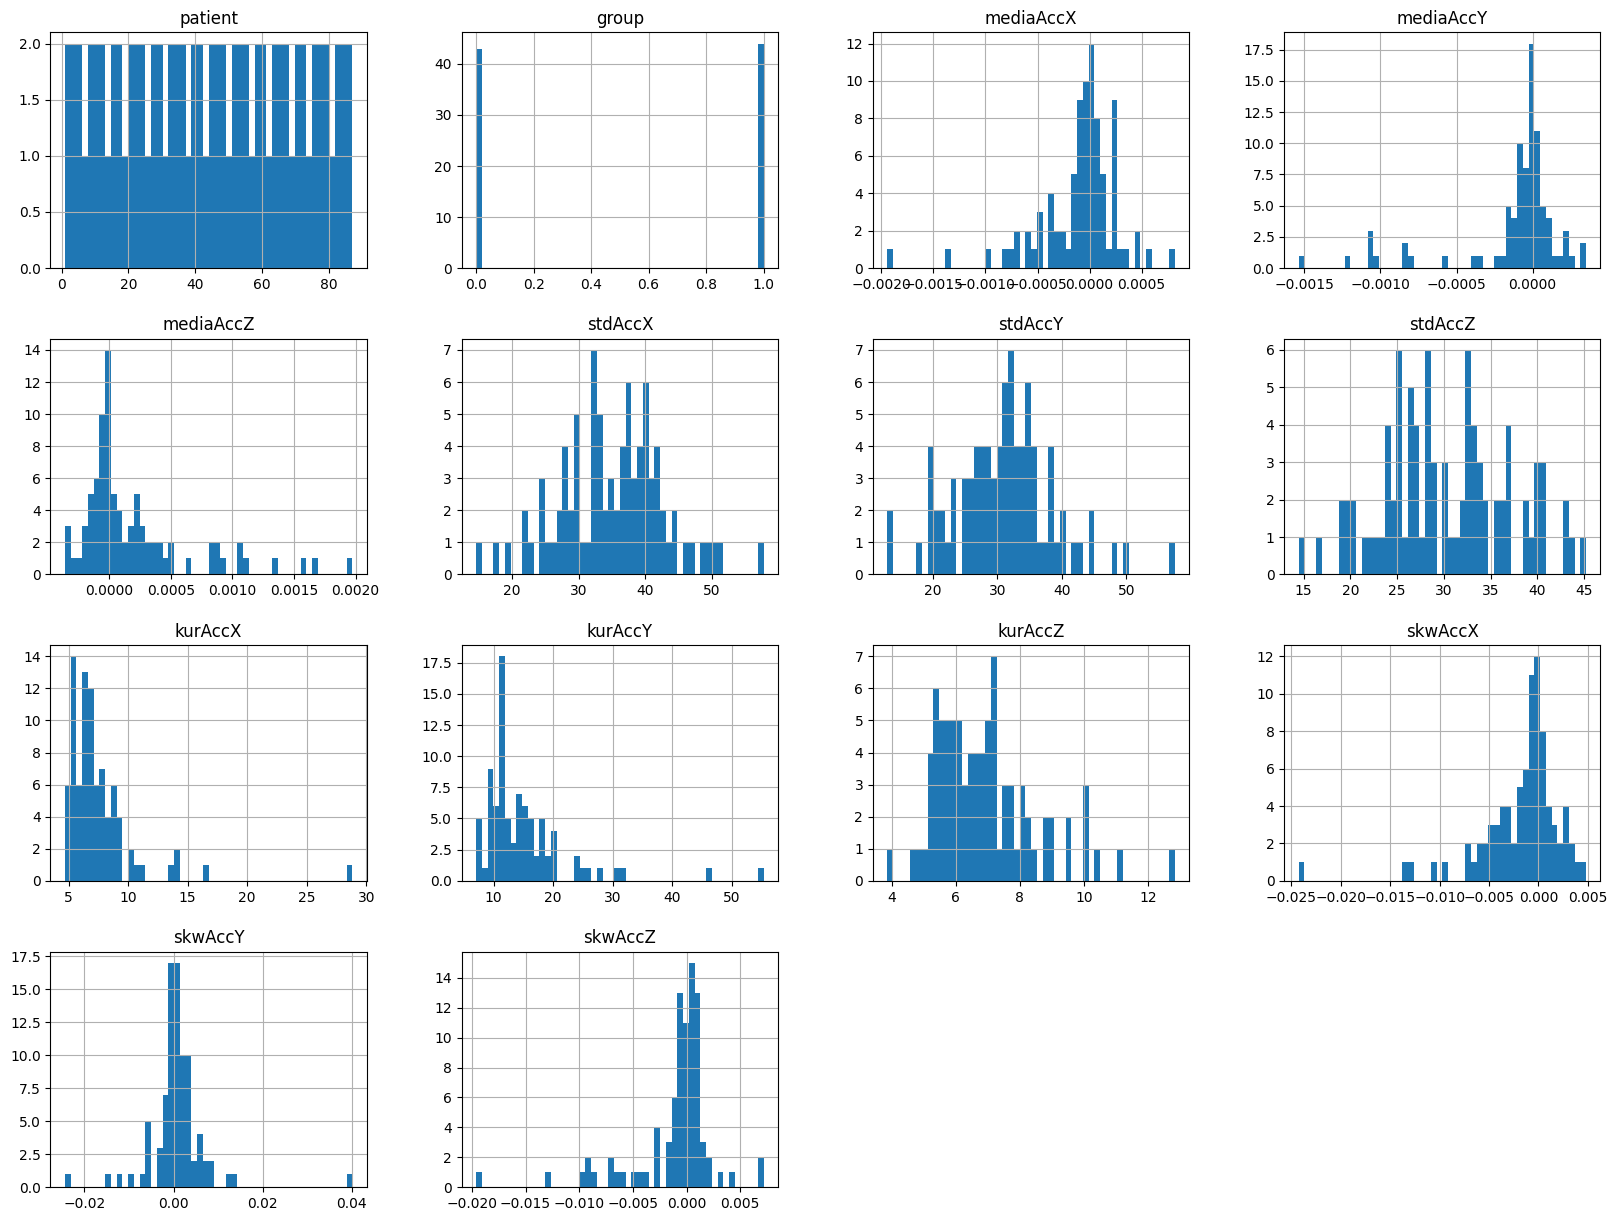

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
patients_vector.hist(bins=50, figsize=(20,15))
plt.show()

Distribution of the features according to the group

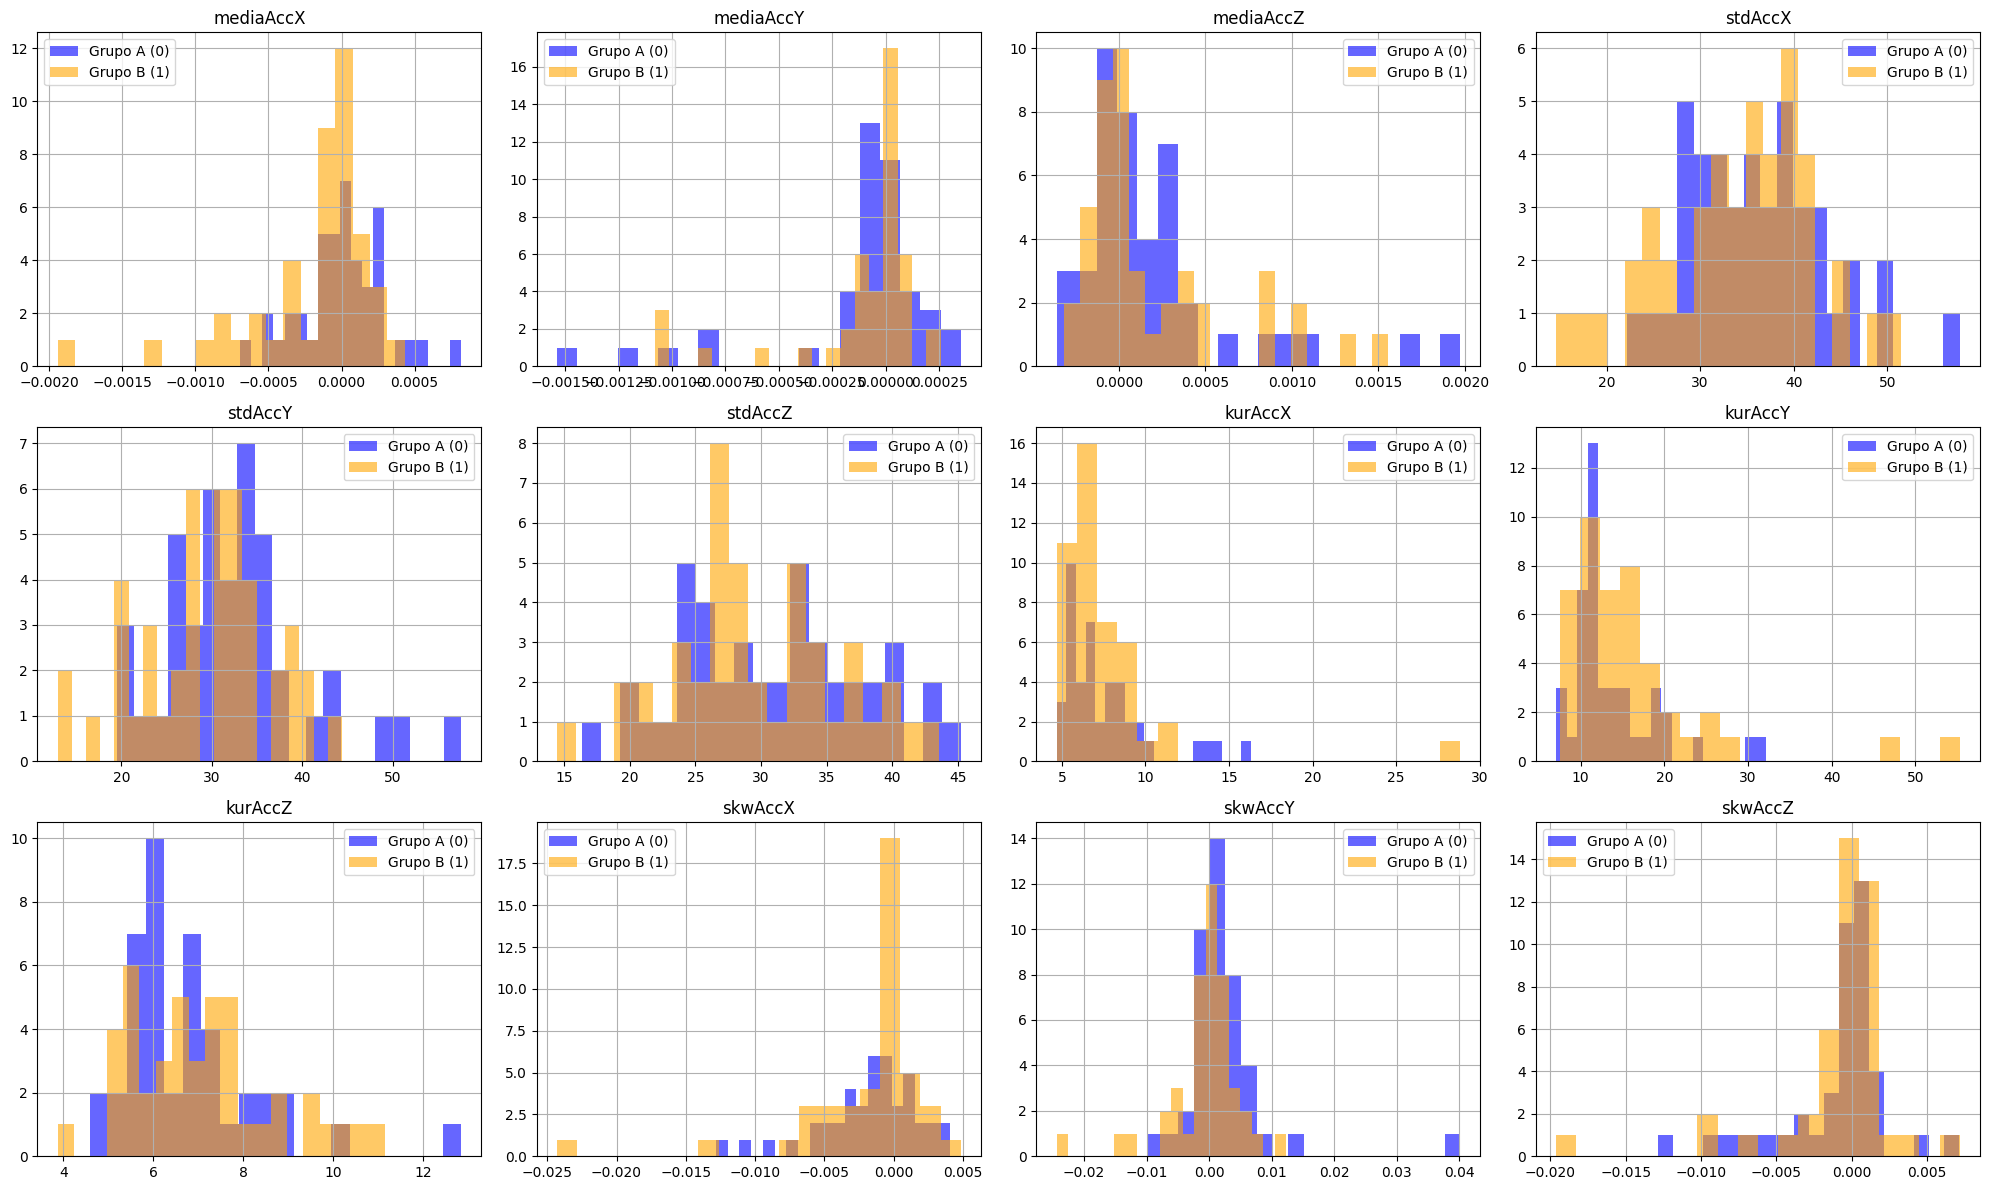

In [7]:
import matplotlib.pyplot as plt

# Filtra los grupos
grupo_a = patients_vector[patients_vector["group"] == 0]
grupo_b = patients_vector[patients_vector["group"] == 1]

# Lista de características (sin 'patient' ni 'group')
features = patients_vector.drop(columns=["patient", "group"]).columns

# Tamaño del gráfico
n_cols = 4
n_rows = (len(features) + n_cols - 1) // n_cols
fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 4 * n_rows))

# Aplanar axes en caso de que sea 2D
axes = axes.flatten()

# Generar histogramas superpuestos
for i, feature in enumerate(features):
    ax = axes[i]
    grupo_a[feature].hist(ax=ax, bins=20, alpha=0.6, color="blue", label="Grupo A (0)")
    grupo_b[feature].hist(ax=ax, bins=20, alpha=0.6, color="orange", label="Grupo B (1)")
    ax.set_title(feature)
    ax.legend()

# Quitar subplots vacíos si hay
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

Exploring correlation

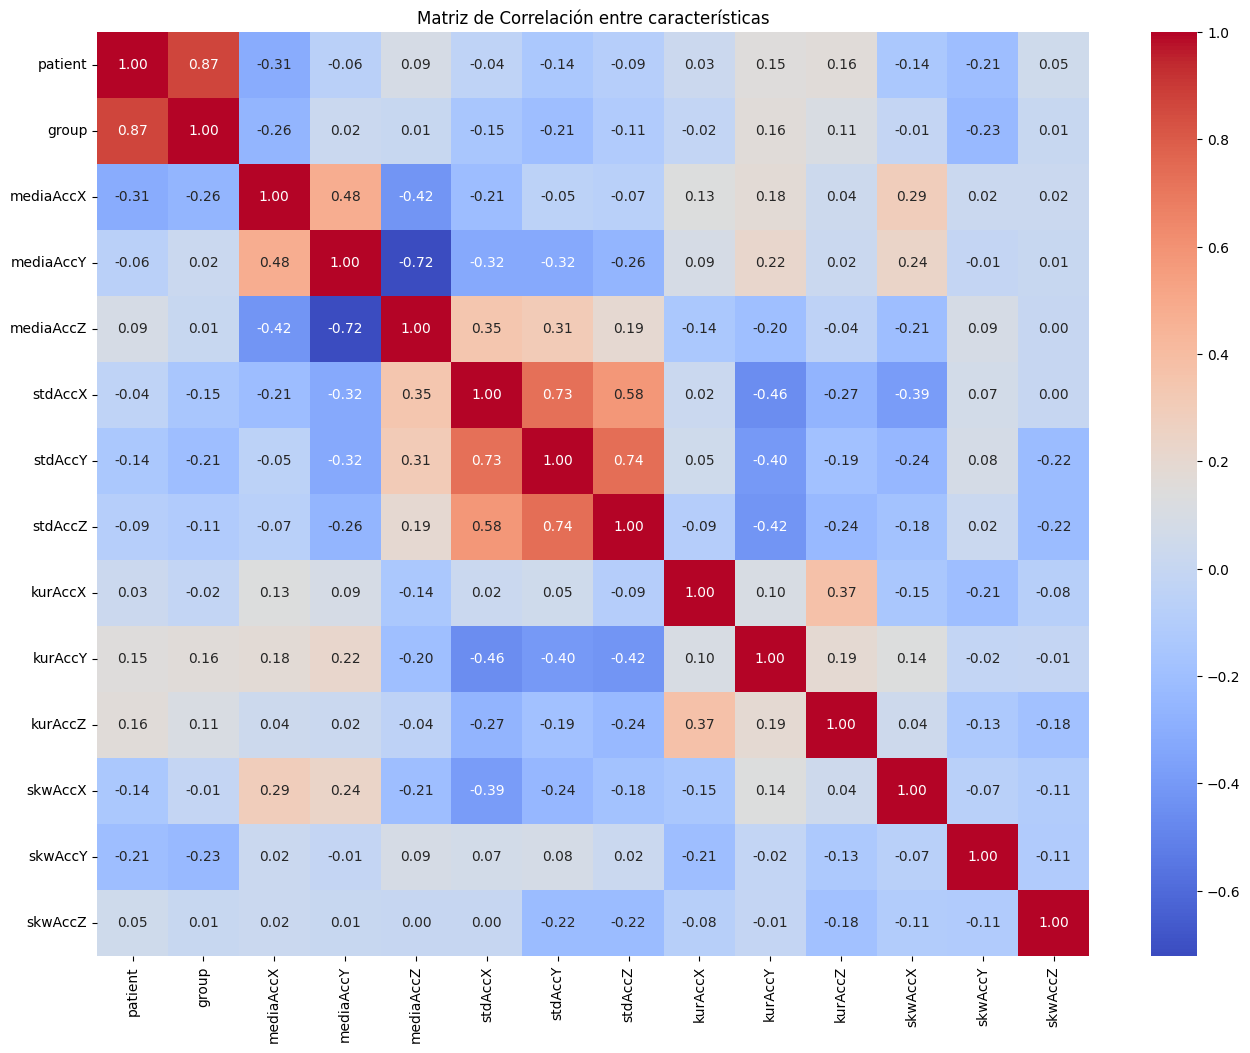

In [8]:
corr_matrix = patients_vector.corr()
import seaborn as sns
# Dibujar el heatmap
plt.figure(figsize=(16,12))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Matriz de Correlación entre características")
plt.show()

Most correlated features StdVel

#Random Forest

In [9]:
# Delete columns not necessaary for the model
df = patients_vector.drop(columns=["patient"])  # 'patient' es solo un identificador

# Separate features from tags of the group
X = df.drop("group", axis=1)
y = df["group"]

Division of the dataset into:
*  80% training
*  20% test

**Stratified sampling** to produce sets that contain a representative ratio of each class.

First, I **separate the test set** as I will use it once at the end of the process.

In [10]:
from sklearn.model_selection import train_test_split

# First separate test set
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42)

**Training using Cross-Validation**
*   Division of the data in 10 parts by defect(cv=10)
*   n_estimators=100
*   max_depth=10
*   random_state=42

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

random_forest_clf = RandomForestClassifier(
    n_estimators=100,
    max_depth=5, #10 or 15 are good options as well
    random_state=42, #seed
)

# Cross-validation
scores = cross_val_score(random_forest_clf, X_train, y_train, cv=10, scoring='accuracy')

# Show the accuracy obtained in each fold
print("Accuracy in each fold:", scores)

# Calculate and display the average accuracy value and standard deviation for the scores of each fold
print(f"Accuracy medio en CV: {scores.mean():.3f}")
print(f"Desviación estándar en CV: {scores.std():.3f}")

Accuracy in each fold: [0.28571429 0.71428571 0.28571429 0.42857143 0.42857143 0.57142857
 0.42857143 0.71428571 0.71428571 0.5       ]
Accuracy medio en CV: 0.507
Desviación estándar en CV: 0.158


Analysis of the **importance of the features**

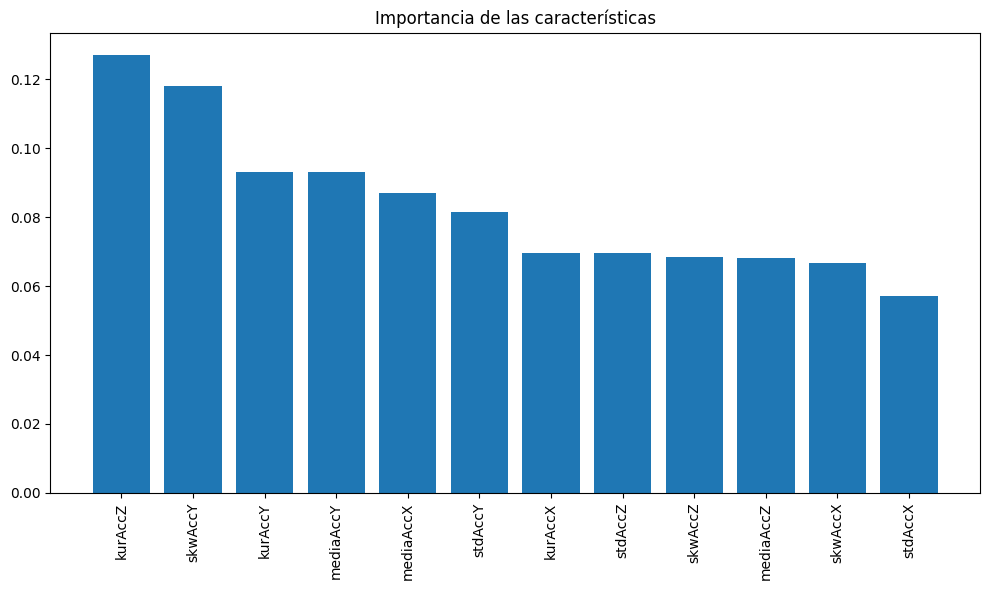

In [12]:
random_forest_clf.fit(X_train, y_train)

importances = random_forest_clf.feature_importances_
feature_names = X.columns

import matplotlib.pyplot as plt
import numpy as np

indices = np.argsort(importances)[::-1]
plt.figure(figsize=(10,6))
plt.title("Importancia de las características")
plt.bar(range(X.shape[1]), importances[indices])
plt.xticks(range(X.shape[1]), feature_names[indices], rotation=90)
plt.tight_layout()
plt.show()

**Final Evaluation using Test Set**

Confusion Matrix and Accuracy

In [13]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix


# Prediction for the test set
y_pred_rf = random_forest_clf.predict(X_test)
# Cuando debería emplear cross_val_predict y sobre qué lo tendría que hacer, sobre el test o el training? Cuando no haga separación entre test y training, sobre todo el data
#y_pred = cross_val_predict(random_forest_clf, X, y, cv=10)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred_rf)
print("\nConfusion matrix:")
print(cm)

# Calculate the accuracy of the model
accuracy = np.mean(y_pred_rf == y_test)
print("Accuracy:", accuracy)


Confusion matrix:
[[4 5]
 [5 4]]
Accuracy: 0.4444444444444444


No aprende nada el modelo ni predice bien

# Multilayer perceptron for classification

In [14]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
import numpy as np

# Crear MLP con dos capas ocultas de 30 neuronas cada una
mlp = mlp_pipeline = make_pipeline(
    StandardScaler(),
    MLPClassifier(hidden_layer_sizes=(30, 30), max_iter=10000, random_state=42)
)
# Validación cruzada
scores = cross_val_score(mlp, X, y, cv=10)
print("Accuracy in each fold:", scores)
print("Mean accuracy:", scores.mean())
print("Standard deviation:", scores.std())

# Predicciones para obtener matriz de confusión y métricas
y_pred_mlp = cross_val_predict(mlp, X, y, cv=10)
print("\nMatriz de confusión:")
print(confusion_matrix(y, y_pred_mlp))

Accuracy in each fold: [0.66666667 0.33333333 0.66666667 0.22222222 0.55555556 0.77777778
 0.55555556 0.125      0.75       0.375     ]
Mean accuracy: 0.5027777777777779
Standard deviation: 0.21505813167606566

Matriz de confusión:
[[23 20]
 [23 21]]


#Logistic Regression

In [15]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# --- Escalado + Logistic Regression ---
logreg_pipeline = make_pipeline(
    StandardScaler(),
    LogisticRegression(random_state=42, max_iter=1000)  # max_iter ↑ para asegurar convergencia
)

# --- Validación cruzada ---
scores = cross_val_score(logreg_pipeline, X, y, cv=10)
print("Accuracy in each fold:", scores)
print("Mean accuracy:", scores.mean())
print("Standard deviation:", scores.std())

# --- Predicciones para matriz de confusión ---
y_pred_lr = cross_val_predict(logreg_pipeline, X, y, cv=10)
print("\nMatriz de confusión:")
print(confusion_matrix(y, y_pred_lr))

Accuracy in each fold: [0.77777778 0.55555556 0.77777778 0.22222222 0.55555556 0.66666667
 0.44444444 0.25       0.625      0.625     ]
Mean accuracy: 0.55
Standard deviation: 0.18364871862295107

Matriz de confusión:
[[22 21]
 [18 26]]


#SVM using LinearSVC

In [16]:
from sklearn.svm import LinearSVC

scaler = StandardScaler()
X_scaled_SVM = scaler.fit_transform(X)

svm_clf = LinearSVC(dual='auto', random_state=42)

scores = cross_val_score(svm_clf, X_scaled_SVM, y, cv=10, scoring='accuracy')
print("Accuracy in each fold:", scores)
print("Mean accuracy:", scores.mean())
print("Standard deviation:", scores.std())

Accuracy in each fold: [0.77777778 0.55555556 0.77777778 0.22222222 0.44444444 0.66666667
 0.44444444 0.         0.625      0.75      ]
Mean accuracy: 0.5263888888888889
Standard deviation: 0.24283323165304566


This is the highest accuracy for the moment, could it be better?

#Red neuronal 1

In [17]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Input
import tensorflow as tf

#Sets all random seeds (Python, NumPy, and TF)
tf.keras.utils.set_random_seed(42)

model = Sequential([
    Input(shape=(12,)),
    Dense(50, activation='relu'),
    Dense(50, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

Training the model

Plot the losses and accuracies of each epoch

Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 2s 73ms/step - accuracy: 0.5200 - loss: 1.8892 - val_accuracy: 0.5714 - val_loss: 0.7356
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.4489 - loss: 0.9308 - val_accuracy: 0.5714 - val_loss: 0.6690
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.4233 - loss: 0.7459 - val_accuracy: 0.5714 - val_loss: 0.8167
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.5324 - loss: 0.7472 - val_accuracy: 0.6429 - val_loss: 0.6417
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.5502 - loss: 0.6600 - val_accuracy: 0.6429 - val_loss: 0.6442
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5405 - loss: 0.6561 - val_accuracy: 0.5714 - val_loss: 0.6786
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5749 - loss: 0.6521 - val_accuracy: 0.5714 - val_loss: 0.6483
Epoch 8/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6135 - loss: 0.6278 - val_accuracy: 0.5714 - val_loss:

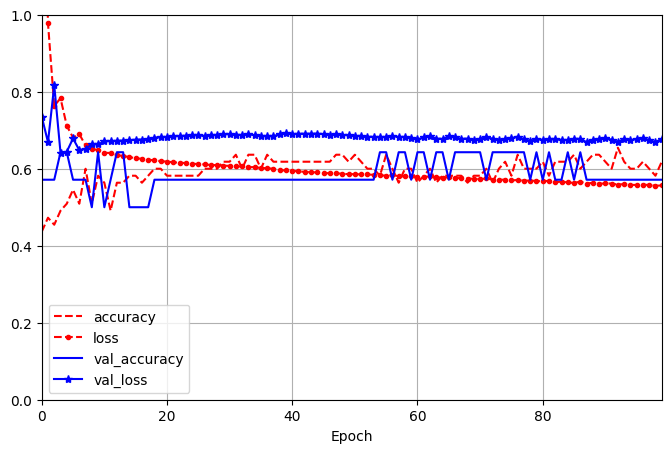

In [18]:
history = model.fit(X_train, y_train, epochs=100, batch_size=8, validation_split=0.2)

pd.DataFrame(history.history).plot(
    figsize=(8, 5), xlim=[0, 99], ylim=[0, 1], grid=True, xlabel="Epoch",
    style=["r--", "r--.", "b-", "b-*"])
plt.legend(loc="lower left")
plt.show()

In [19]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test accuracy: {accuracy:.3f}")

model.summary()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - accuracy: 0.4444 - loss: 1.3508
Test accuracy: 0.444


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 50)             │           650 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 50)             │         2,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,755 (38.11 KB)

 Trainable params: 3,251 (12.70 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,504 (25.41 KB)

**OVERFITTING**. Voy añadir escalado, early stopping y reducir el numero de capas y de neuronas

#Red Neuronal 2

He reducido los "recursos" para tener un modelo más sencillo, de menos capas y neuronas.

También he añadido escalado y early stopping para que se detenga el entrenamiento cuando la red deje de mejorar en validación

Epoch 1/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.5586 - loss: 0.6372 - val_accuracy: 0.5714 - val_loss: 0.6743
Epoch 2/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6575 - loss: 0.5819 - val_accuracy: 0.6429 - val_loss: 0.6548
Epoch 3/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.6437 - loss: 0.5546 - val_accuracy: 0.6429 - val_loss: 0.6472
Epoch 4/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6709 - loss: 0.5298 - val_accuracy: 0.6429 - val_loss: 0.6452
Epoch 5/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7759 - loss: 0.5067 - val_accuracy: 0.6429 - val_loss: 0.6453
Epoch 6/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7759 - loss: 0.4864 - val_accuracy: 0.5714 - val_loss: 0.6446
Epoch 7/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.7953 - loss: 0.4679 - val_accuracy: 0.6429 - val_loss: 0.6448
Epoch 8/100
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.8271 - loss: 0.4510 - val_accuracy: 0.6429 - val_loss:

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 50)             │           650 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 50)             │         2,550 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,755 (38.11 KB)

 Trainable params: 3,251 (12.70 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,504 (25.41 KB)

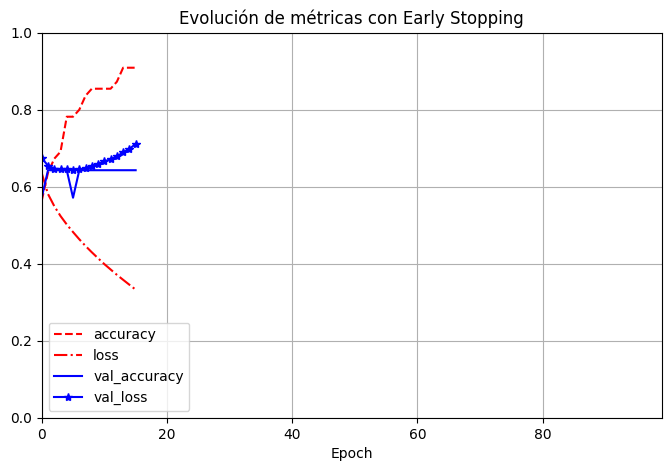

In [20]:
from tensorflow.keras.callbacks import EarlyStopping
tf.keras.utils.set_random_seed(42)

# Escalado
scaler = StandardScaler()
X_train_redneuronal2 = scaler.fit_transform(X_train)
X_test_redneuronal2 = scaler.transform(X_test)

model2 = Sequential([
    Input(shape=(12,)),
    Dense(20, activation='relu'),
    Dense(1, activation='sigmoid')
])

model2.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

early_stop = EarlyStopping(
    monitor='val_loss',        # métrica que se monitoriza
    patience=10,               # número de epochs sin mejora antes de detener
    restore_best_weights=True # recupera los mejores pesos al final
)

history = model.fit(
    X_train_redneuronal2, y_train,
    epochs=100,
    batch_size=8,
    validation_split=0.2,
    callbacks=[early_stop]
)

loss, accuracy = model.evaluate(X_test_redneuronal2, y_test)
print(f"Test accuracy: {accuracy:.3f}")

model.summary()

pd.DataFrame(history.history).plot(
    figsize=(8, 5), xlim=[0, 99], ylim=[0, 1], grid=True, xlabel="Epoch",
    style=["r--", "r-.", "b-", "b-*"]
)
plt.title("Evolución de métricas con Early Stopping")
plt.legend(loc="lower left")
plt.show()